In [48]:
import numpy as np
import matplotlib.pyplot as plt
from massspec import *
%matplotlib qt

In [49]:
exp = AnalyzeAcq("N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData")

In [50]:
exp

In [51]:
tof = AnalyzeAcq("N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData") 

In [52]:
tof

## Plotting multiple spectra in one figure THIS DATA SET makes a problem 
#2020-09-18,Datenumbers,100, None, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25?????
---

In [53]:
date = "2020-10-06"

In [54]:
date

'2020-10-06'

In [55]:
#ito = exp.load_data(date=date, 
                   #subset=list(range(1,13)))

In [56]:
ito = exp.load_data(date=date, subset=[1,4,5,8,9,12]) #data set for pharos illumination 2020-10-06

0 : 01.signal.div
1 : 04.signal.div
2 : 05.signal.div
3 : 08.signal.div
4 : 09.signal.div
5 : 12.signal.div


In [57]:
ito

['N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\01.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\04.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\05.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\08.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\09.signal.div',
 'N:\\4all\\mpsd_drive\\massspec\\VacuumDIVE\\ExperimentalData\\TOFData\\2020-10-06\\12.signal.div']

In [58]:
ito_h = []
for d in ito:
    ito_h.append(exp.read_header(d))
    
ito_t = []
for h in ito_h:
    ito_t.append(exp.time(h))
    
ito_voltages = []
for i in range(len(ito)):
    ito_voltages.append(exp.read_frames(ito[i], ito_h[i]))
    
ito_mz, ito_v = [], []

ito_params = [16000, 14500, 0.004, 0.047, 1.07]

for i in range(len(ito)):
    o = exp.m2z(ito_t[i], ito_voltages[i], ito_params)
    ito_mz.append(o[0])
    ito_v.append(o[1])

In [59]:
#ito = exp.load_data(date=date, 
                    #subset=list(range(4,8)))

Everything so far should be familiar from the first tutorial. We have to use the function `plot_spectra` to plot multiple spectra in one figure. First, check its arguments:

We already have the following arguments: `headers` (ito_h), `mz` (ito_mz), and `voltages` (ito_v).

In [63]:
substrate = "indium tin oxide"
substrate = "silicon 0.1-1 \u03A9·$cm^{-1}$" #centered point alt+0183

# note that the text between the dollar signs will be written in LaTeX
sample = "100 $\mu$M bradykinin in pure water, 170 nl" 

pulse_E_dict = tof.get_pulse_energies(date=date, 
                                      wavelength='1026nm',
                                      nd='None')

# recall that get_pulse_energies outputs a dictionary; since we're only interested in the energies in Joules, 
# we have to extract the values and put them in a list
pulse_E = list(pulse_E_dict.values())
print(pulse_E)

# plotprops is shorthand for plot properties
plotprops = {
    "offset" : 0.5, # the space between each spectra
    "figsize" : (15,10),
    "title" : f"$\lambda$=1026 nm and 513 nm, 190 fs, {sample} on {substrate}, front illumination",
    "xlabel" : 'mass-to-charge [m/z]'#mass-to-charge [m/z]Time [$\mu$s]
}

['6.5 $\\mu$J', '6.5 $\\mu$J', '6.5 $\\mu$J', '6.5 $\\mu$J', '6.5 $\\mu$J', '6.5 $\\mu$J']


In [64]:
times_ex =[]
for i in range(len(ito_h)):
   times_ex.append(int((ito_h[i]['t'][0]-ito_h[0]['t'][0])/60))
times_ex

[0, 56, 81, 156, 236, 342]

In [65]:
pulse_E 

['6.5 $\\mu$J',
 '6.5 $\\mu$J',
 '6.5 $\\mu$J',
 '6.5 $\\mu$J',
 '6.5 $\\mu$J',
 '6.5 $\\mu$J']

Notice that `plot_spectra` uses the argument `labels` for the legend. It automatically extracts the number of shots from the headers.

In [73]:
exp.plot_spectra(headers=ito_h, 
                 mz=ito_mz, 
                 voltages=ito_v, 
                 labels=pulse_E, 
                 plotprops=plotprops,
                 times=times_ex,
                 savefig='spectra.png')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(reversed(handles), reversed(labels), fontsize=18)

If we want to zoom in, we must define the x- and y-limits in the `plotprops` argument. We must adjust the offset and account for it in the upper y-limit.

In [67]:
plotprops_zoom = {
    "offset" : 0.1,
    "figsize" : (15,10),
    "xlim" : (0, 1500),
    "ylim" : (-0.3, 0.1*6+0.6),
    "title" : f"$\lambda$=1026 nm, 190 fs, {sample} on {substrate}",
    "xlabel" : 'mass-to-charge [m/z]'#mass-to-charge [m/z]Time [$\mu$s]
}

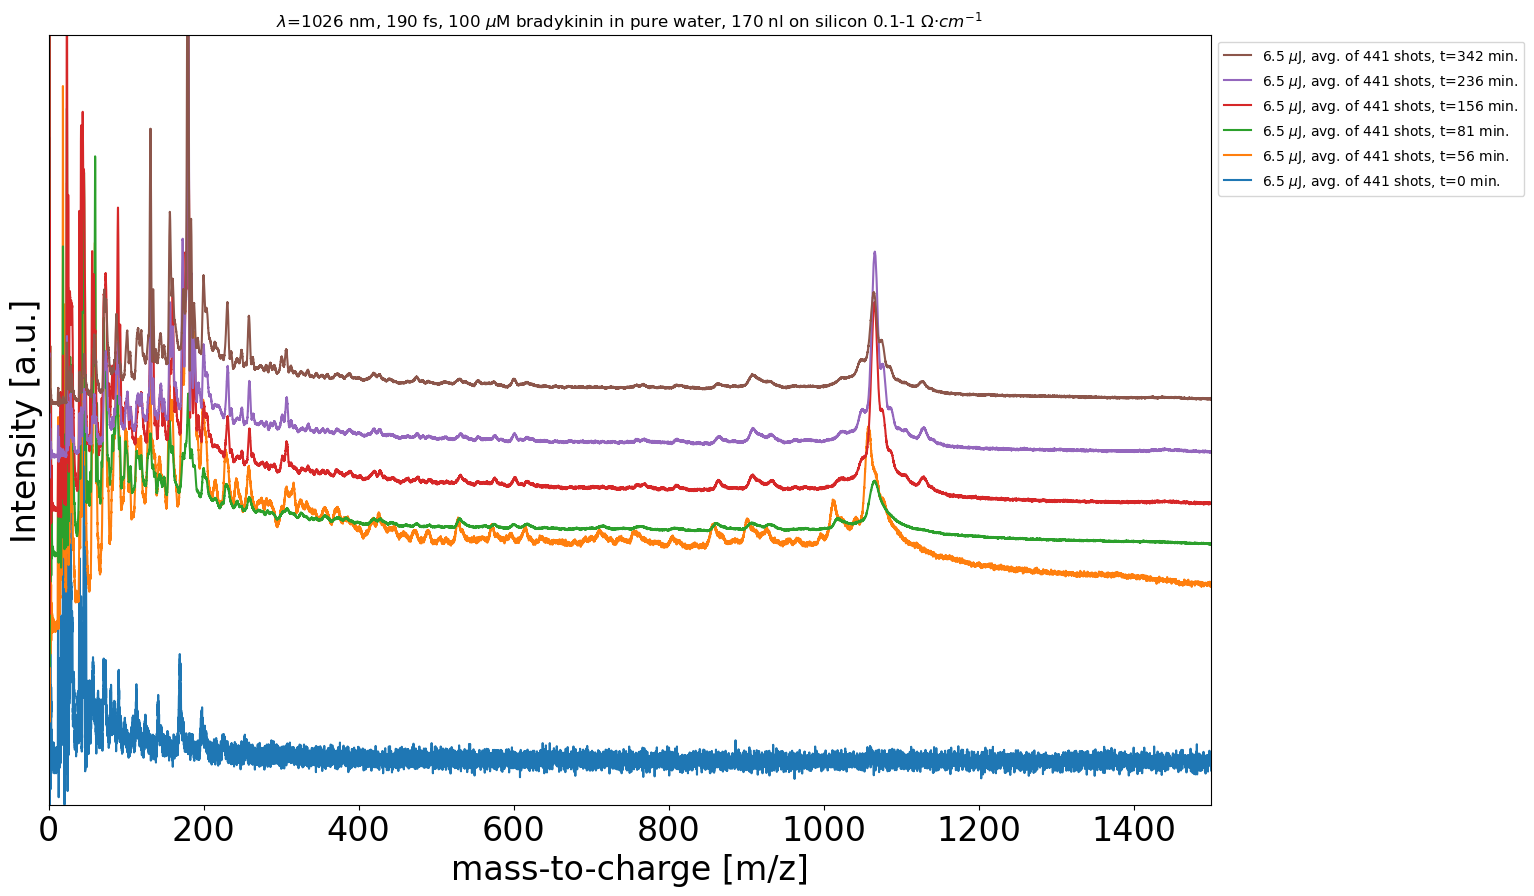

In [68]:
exp.plot_spectra(headers=ito_h, 
                 mz=ito_mz, 
                 voltages=ito_v, 
                 labels=pulse_E, 
                 plotprops=plotprops_zoom,
                 times=times_ex,
                 savefig='spectra.png',
                 
                )

ZOOM for small mass ions